# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

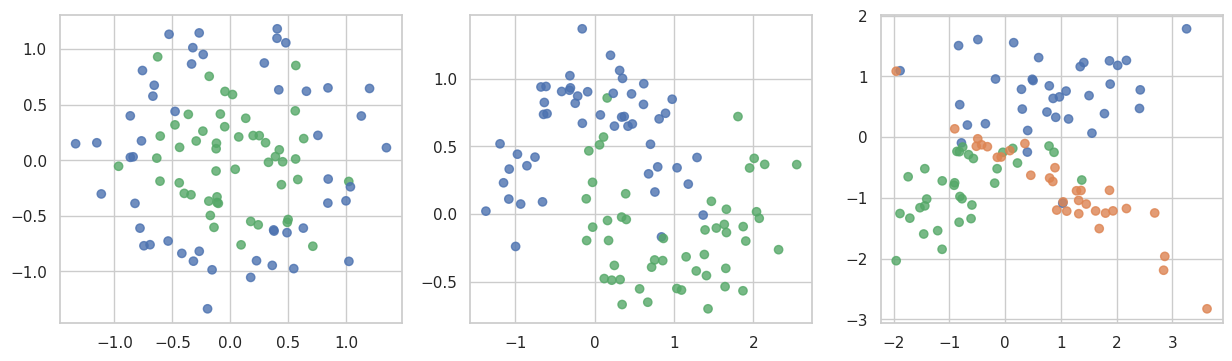

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

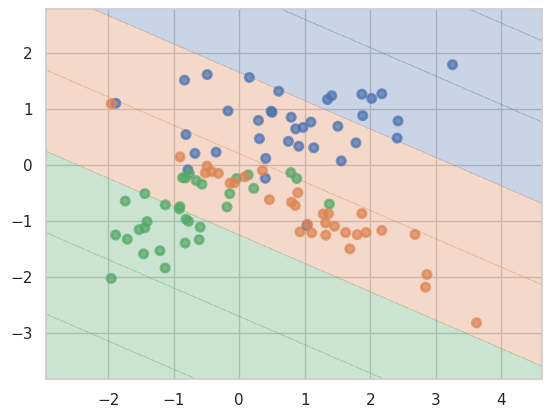

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
def calc_accuracy(y_true, y_pred):
    correct_preds = np.sum(y_true == y_pred)
    accuracy = correct_preds/len(y_true)
    return accuracy

Accuracy for the tree #1 on train: 1.0
Accuracy for the tree #1 on test: 0.6
Accuracy for the tree #2 on train: 1.0
Accuracy for the tree #2 on test: 0.8
Accuracy for the tree #3 on train: 1.0
Accuracy for the tree #3 on test: 0.6666666666666666


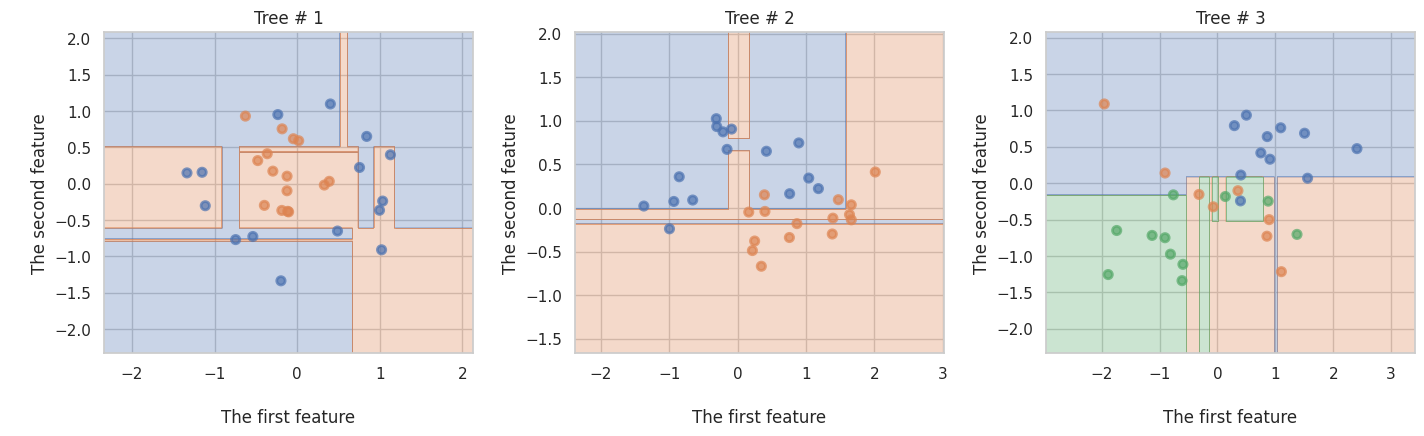

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
  X, y = datasets[i]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
  tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
  plt.sca(axes[i])
  plt.title(f'Tree # {i+1}')
  plt.xlabel('\nThe first feature')
  plt.ylabel('\nThe second feature')
  plt.tight_layout()
  plot_surface(clf=tree_classifier, X=X_test, y=y_test)
  #теперь, чтобы заново не обучать деревья, сразу же подсчитаем accuracy
  y_pred_train = tree_classifier.predict(X_train)
  train_ac = calc_accuracy(y_train, y_pred_train)
  test_ac = calc_accuracy(y_test, tree_classifier.predict(X_test))
  print(f'Accuracy for the tree #{i+1} on train:', train_ac)
  print(f'Accuracy for the tree #{i+1} on test:', test_ac)



---

__Ответ:__
Как видно из графиков, деревья имеют довольно плохую обобщающую способность. На
тесте они допускают довольно много ошибок. То есть, они довольно сильно переобучаются. Это показывает и точность на трейне и на тесте. Как видим, поскольку мы не накладывали никаких ограничений на деревья, а также скорее всего для одинаковых иксов(если они вообще есть) у нас не было разных игреков, то дерево смогло идеально предсказать класс для каждого объекта на обучающей выборке, в связи с чем и переобучилось.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=15 on train: 0.7857142857142857
Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=15 on test 0.7
____________________

Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=5 on train: 0.8142857142857143
Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=5 on test 0.6666666666666666
____________________

Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=1 on train: 0.8285714285714286
Accuracy for the dataset #1 with max_depth=2 and min_samples_leaf=1 on test 0.6333333333333333
____________________

Accuracy for the dataset #1 with max_depth=4 and min_samples_leaf=15 on train: 0.7857142857142857
Accuracy for the dataset #1 with max_depth=4 and min_samples_leaf=15 on test 0.7
____________________

Accuracy for the dataset #1 with max_depth=4 and min_samples_leaf=5 on train: 0.8714285714285714
Accuracy for the dataset #1 with max_depth=4 and min_samples_leaf=5 on te

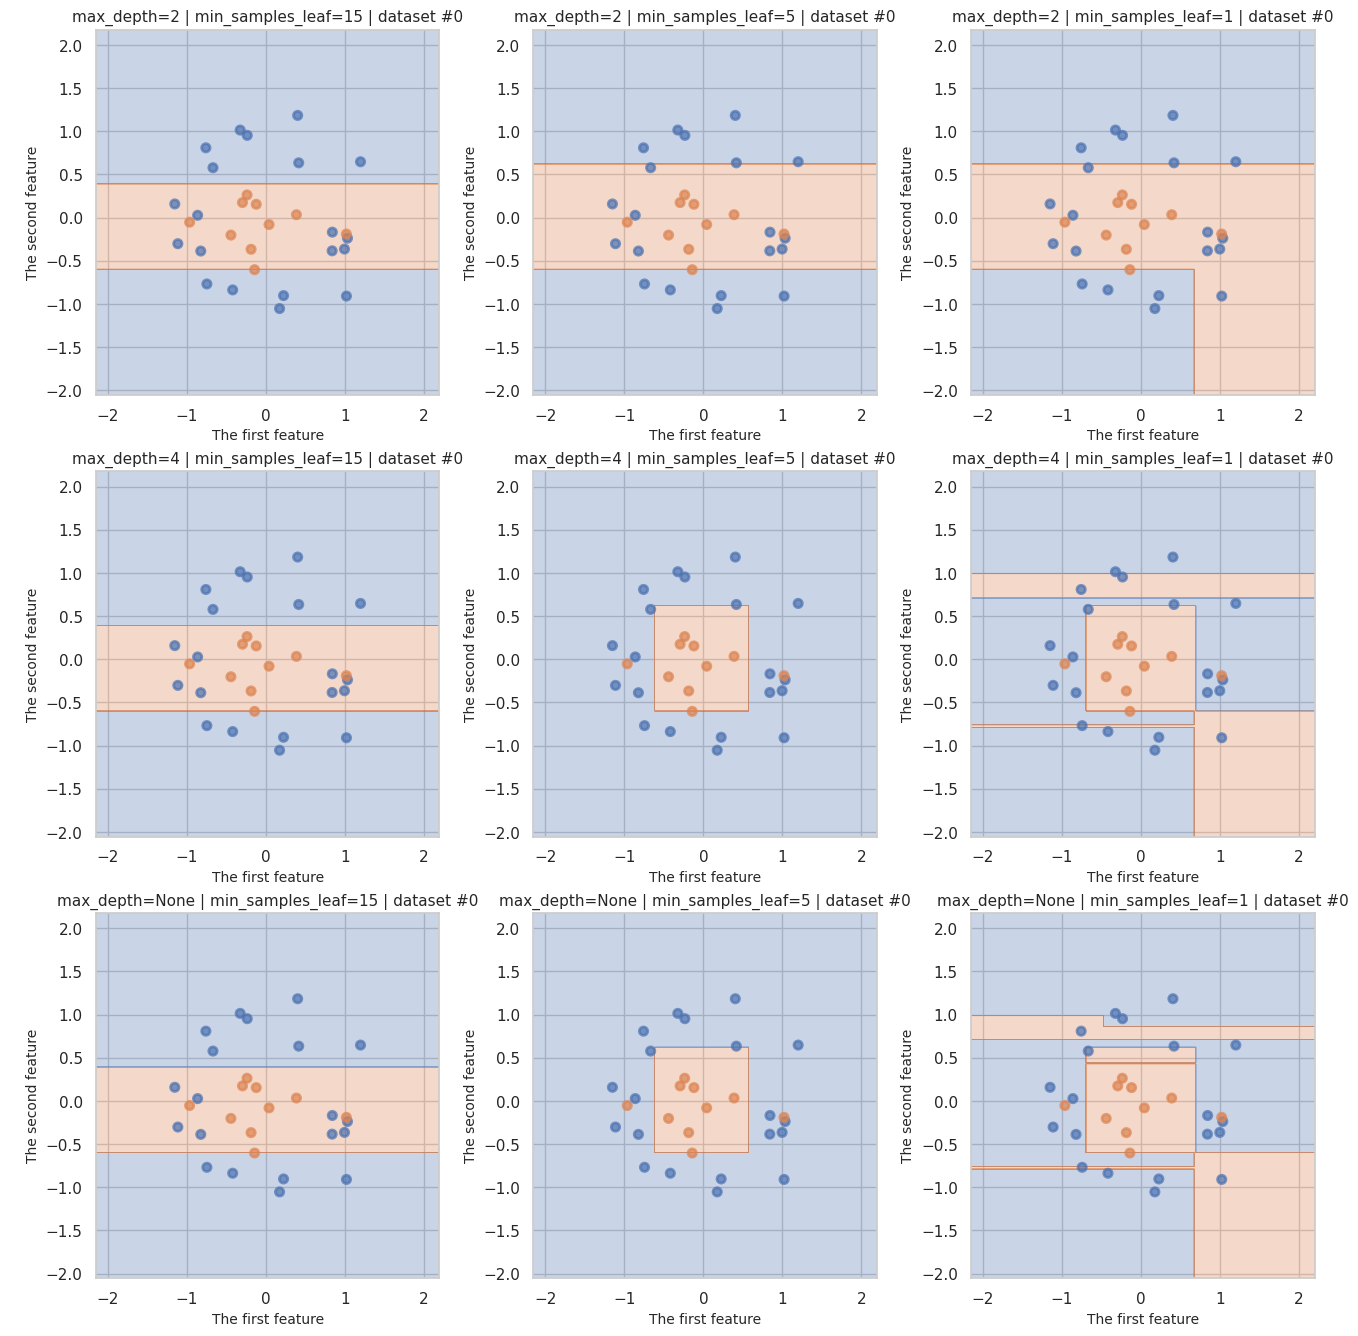

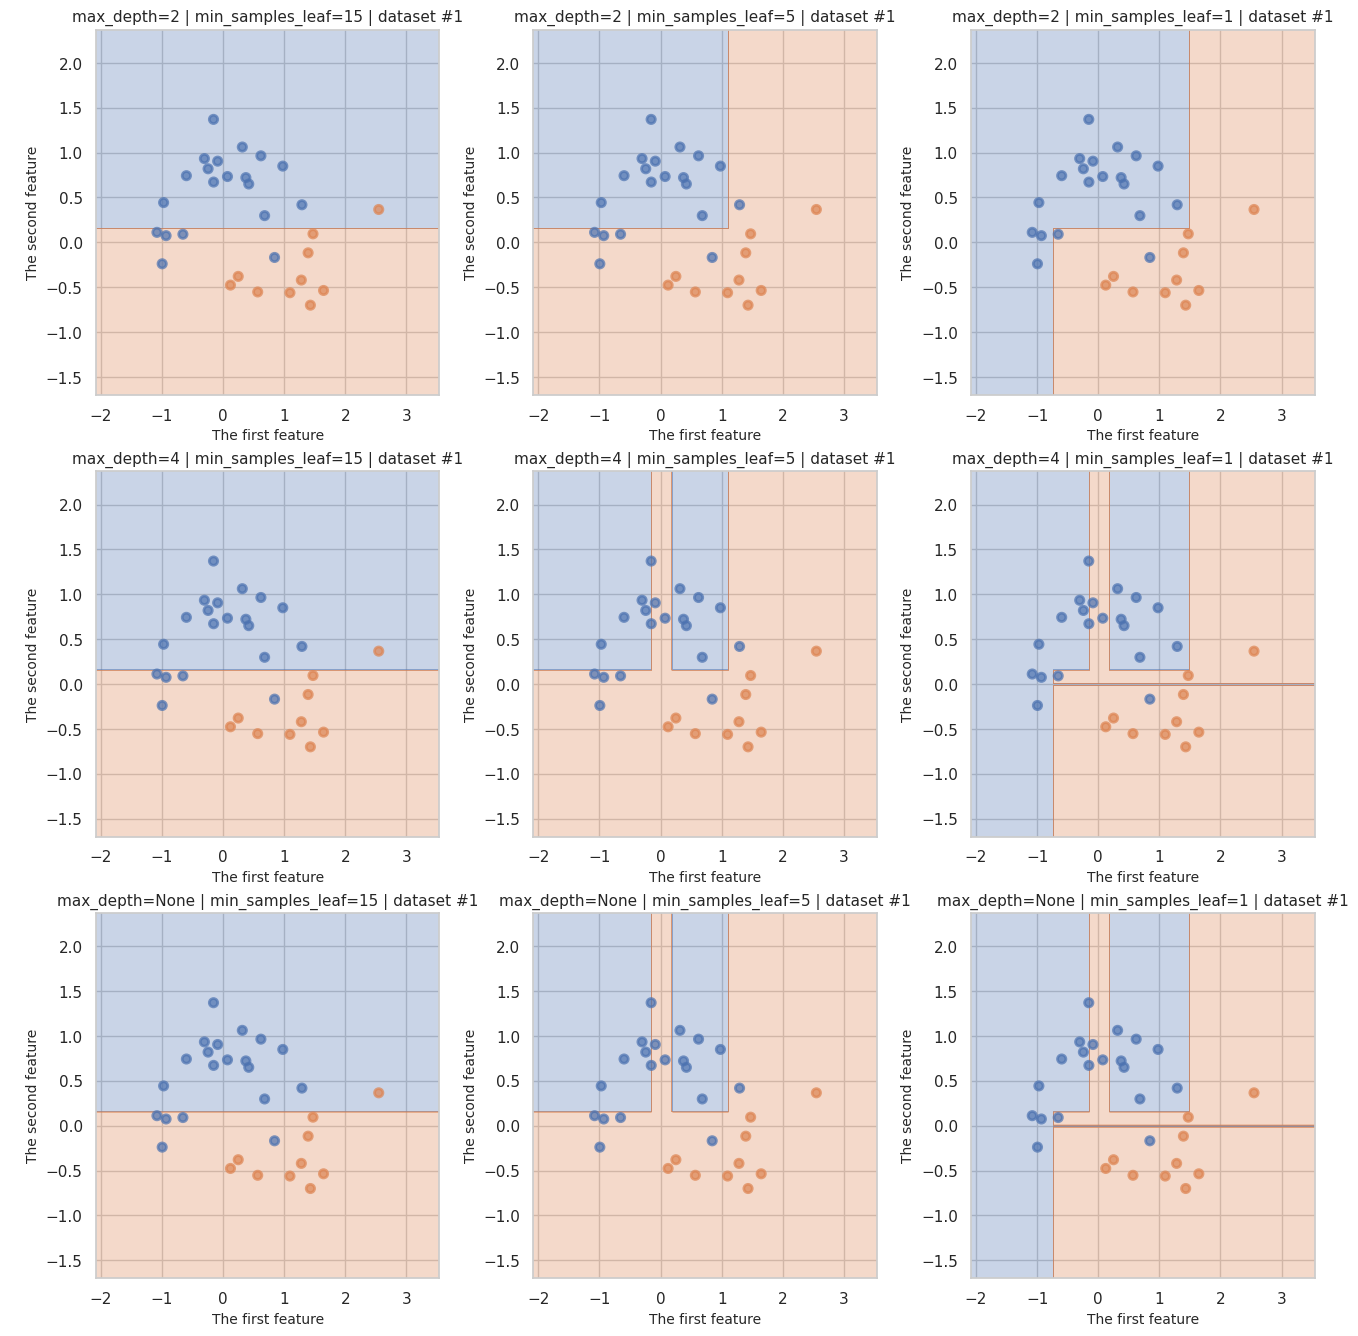

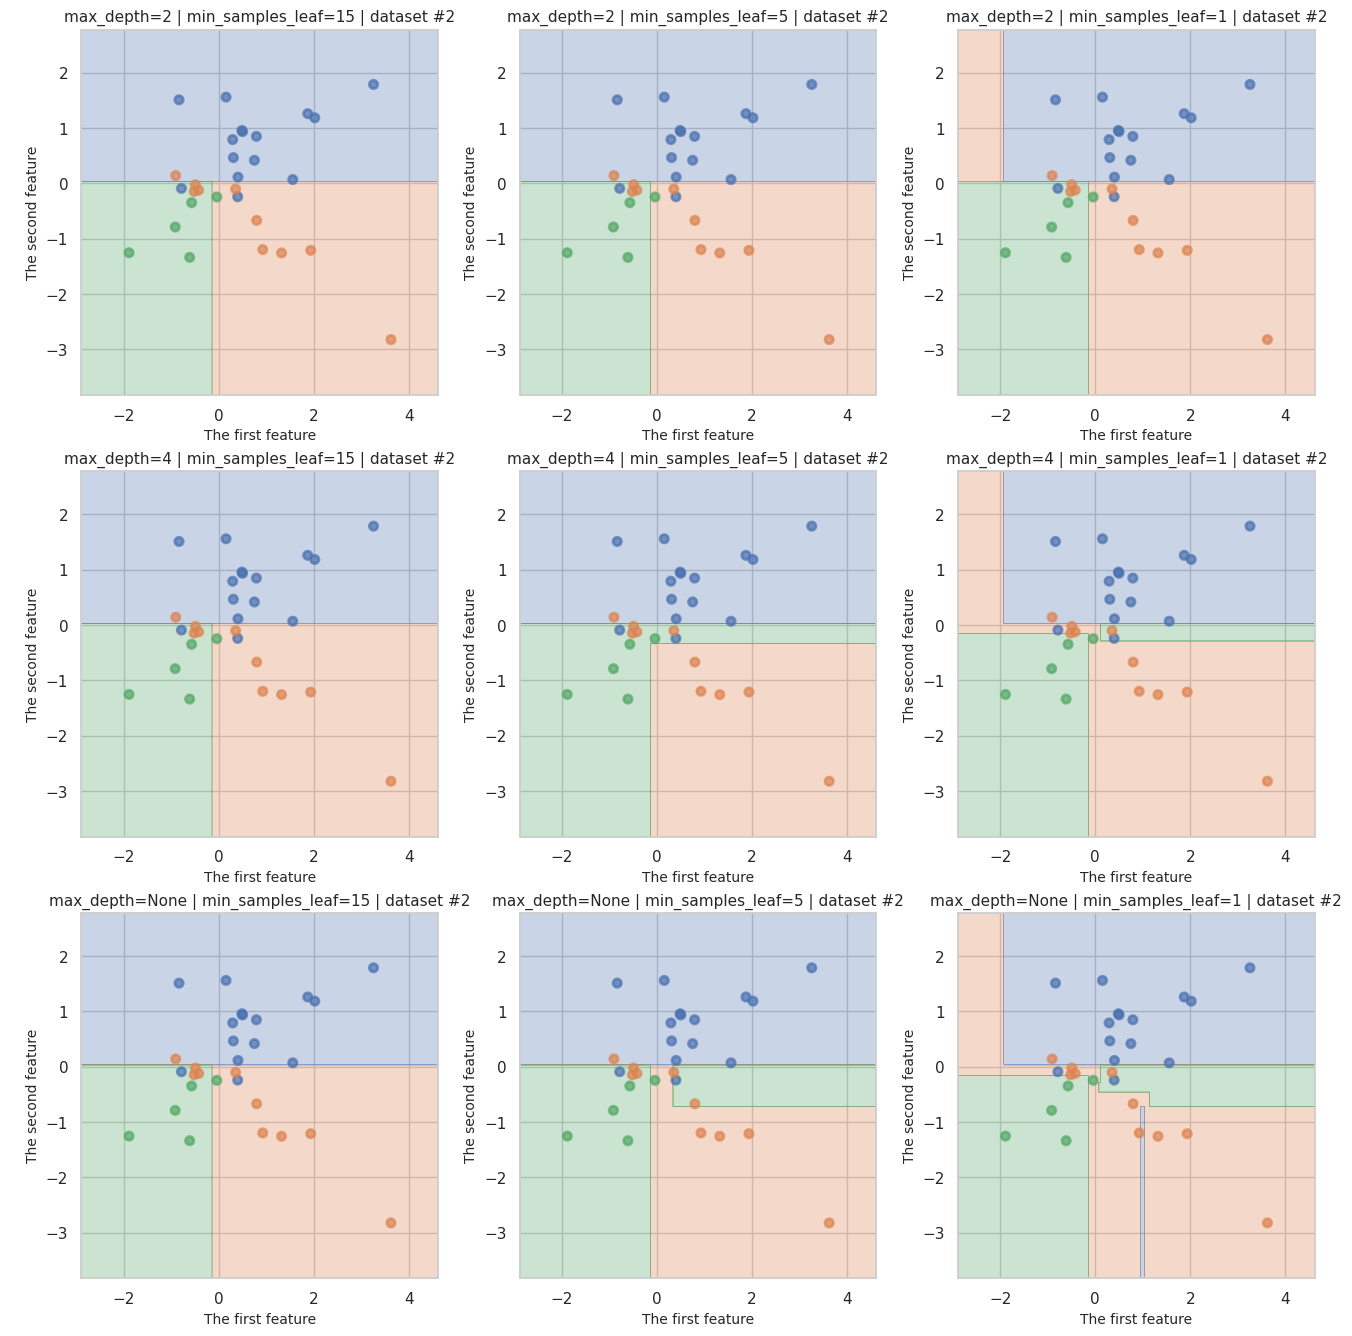

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for k in range(3):
  X, y = datasets[k]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  #следующая часть была взята частично из семинаров
  plt.figure(figsize=(14, 14))
  for i, max_depth in enumerate([2, 4, None]):
      for j, min_samples_leaf in enumerate([15, 5, 1]):
          clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
          clf.fit(X_train, y_train)
          plt.subplot2grid((3, 3), (i, j))
          plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf) + ' | ' + f'dataset #{k}', fontsize=11)
          plt.xlabel('The first feature', fontsize=10)
          plt.ylabel('\nThe second feature', fontsize=10)
          plot_surface(clf=clf, X=X_test, y=y_test)
          y_pred_train = clf.predict(X_train)
          train_ac = calc_accuracy(y_train, y_pred_train)
          test_ac = calc_accuracy(y_test, clf.predict(X_test))
          print(f'Accuracy for the dataset #{k+1} with max_depth={max_depth} and min_samples_leaf={min_samples_leaf} on train:', train_ac)
          print(f'Accuracy for the dataset #{k+1} with max_depth={max_depth} and min_samples_leaf={min_samples_leaf} on test ' + str(test_ac) + '\n' + '_' * 20 + '\n')

__Ответ:__
Как мы видим, на первом датасете при глубине 2 модель в целом недообучивается, а потому имеет самую худшую точность. При глубине 4 результаты намного лучше, поскольку модель уже более сложная, а потому разделяет объекты лучше. При этом, когда минимальное количество в листе 15 - то модель все же не может достаточно хорошо разделить. Когда оно равно 5 - то это как бы золотая середина - дерево не слишком глубокое и не слишком мелкое, при этом, минимальное количество в листьях не слишком маленькое и не слишком большое, а потому оно более менее хорошо обобщается и выдает лучшую точность. Конечно, все зависит от рандома, на скорее всего в среднем это так. При этом, у этого датасета можно заметить особенность, при минимальном количестве элементов в листьях, равному 5 при максимальной глубине больше либо равной 4м дерево не использует дальше глубину.То есть ограничение в 5 элементов в листе достигается быстрее, чем ограничение по глубине. Это скорее всего связано с тем, что определенные данные легко отделить от остальных. Что же касается случая с неограниченной глубиной - при ограничении в 15 элементов в листе мы недообучаемся, при 5 - лучшая модель(потому что совпадает с моделью при максимальной глубине 4), а при 1 - сильно переобучается и точность начинает падать.

Что касается второго датасета - скорее всего там данные довольно легко разделимы(может быть много объектов положительного или отрицательного класса), а также тест и трейн довольно похожи - а потому, даже при глубине 2 точность модели и на трейне, и на тесте довольно высокая и только растет с падением минимального числа элементов, поскольку благодаря этому модель скорее может выкинуть из общего числа объектов одного типа маленькую группу объектов, которые другого типа, что повышает точность на обучающей выборке. Ну а поскольку тестовые и обучающие данные скорее всего оказались довольно похожими - то и на тесте скорее всего будет хорошая точность. При глубине 4 модель начинает слишком сильно подгоняться под обучающие данные, а потому выдавать уже более плохие показатели точности на трейне. Можно также заметить, что глубины 4 и минимального количества объектов в листе, равного 1, хватило, чтобы идеально объяснить обучающую выборку, что скорее всего связано с тем, что было сколько-то объектов(1-4), которые попадали в вершину вместе с другим классом, но дерево не могло их отдлить, а теперь смогло. И еще стоит сказать, что при глубине 4 точность на тесте максимальная именно в этом случае, поскольку данные на обучающей выборке и на тесте очень похожи. С неограниченной максимальной глубиной дерево опять же слишком сильно подстраивается под обучающую выборку и начинает переобучаться, что ухудшает обобщающую способность и точность на тесте, однако все равно из-за похожести данных она остается довольно высокой.

Что касается 3го датасета - там данные также довольно легко разделимы, посокольку мы видим, что даже при глубине 2 у нас довольно высокие показатели точности, как на трейне - так и на тесте, что говорит о схожести данных. При глубине 4 точность на тесте в среднем улучшается, поскольку модель становится более сложной и получает больше зависимостей. А посольку трейн похож на тест - то и обобщающая способность хорошая. В случае же с неограниченной максимальной глубиной модель довольно схожа с моделью при максимальной глубине дерева, равной 4, однако все-таки в некоторых случаях переобучается сильнее, что ухудшает ее обобщающую способность.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    combined = np.column_stack((feature_vector, target_vector))
    sorted_indices = np.argsort(combined[:, 0])
    sorted_combined = combined[sorted_indices]

    sorted_features = sorted_combined[:, 0]  # Первый столбец
    sorted_targets = sorted_combined[:, 1]  # Второй столбец

    thresholds = (sorted_features[:-1] + sorted_features[1:]) / 2
    thresholds = thresholds[sorted_features[:-1] != sorted_features[1:]]

    cumsum_left = np.cumsum(sorted_targets)[:-1][sorted_features[:-1] != sorted_features[1:]]
    cumsum_right = np.cumsum(sorted_targets)[-1] - cumsum_left
    left_quant = np.arange(1, len(sorted_targets))[sorted_features[:-1] != sorted_features[1:]]
    right_quant = len(sorted_targets) - left_quant
    p1 = cumsum_left / left_quant
    p0 = 1 - p1

    # Доли классов в правом поддереве
    p1_r = cumsum_right / right_quant
    p0_r = 1 - p1_r

    H_l = 1 - p1**2 - p0**2
    H_r = 1 - p1_r**2 - p0_r**2
    '''
    Поскольку в левое поддерево будут отправляться только первые объекты, поскольку у нас пороги устроены таким образом, что каждое значение порога соответствует передвижению к
    следующему объекту. То, что у нас могут быть одинаковые объекты, а соответственно и одинаковые трешхолды и индексы джини мы учтем уже при подсчете вектора ginis.
    Сейчас будем за одну итерацию просто проходить один элемент - просто посчитаем накопленную сумму, а затем делим ее на количество элементов в данный момент,
    получив таким образом долю первого класса в левом поддереве
    '''
    # Вычисляем веса для левого и правого поддеревьев
    weight_l = (left_quant / len(sorted_targets))
    weight_r = (right_quant / len(sorted_targets))

    ginis = -weight_l * H_l - weight_r * H_r

    # Находим оптимальный порог и соответствующий ему критерий Джини
    best_index = np.argmax(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):

        if self._max_depth is not None:
          if depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_split is not None:
          if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
              continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if self._min_samples_leaf is not None:
              split = feature_vector < threshold
              if np.sum(split) < self._min_samples_leaf or np.sum(~split) < self._min_samples_leaf:
                continue

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
            return node["class"]
        elif self._feature_types[node["feature_split"]] == "real":
          if x[node["feature_split"]] < node["threshold"]:
            return self._predict_node(x, node["left_child"])
          else:
            return self._predict_node(x, node["right_child"])
        elif self._feature_types[node["feature_split"]] == "categorical":
          if x[node["feature_split"]] in (node["categories_split"]):
            return self._predict_node(x, node["left_child"])
          else:
            return self._predict_node(x, node["right_child"])
        else:
          raise ValueError

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    def calculate_tree_depth(self, node):
      if len(node) == 0:
        return 0
      elif node["type"] == "terminal":
        return 0
      else:
        left_depth = self.calculate_tree_depth(node["left_child"])
        right_depth = self.calculate_tree_depth(node["right_child"])
        return max(left_depth, right_depth) + 1

class LinearRegressionTree():
    def __init__(self, feature_types, base_model_type=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        pass

In [ ]:
!wget  -O 'students.csv' -q 'https://www.dropbox.com/scl/fi/1lmbtdnyqh78wjprk6baz/students.csv?rlkey=8pvjhr00zilmdguw2vdm71f8i&st=npvee2ff&dl=0'

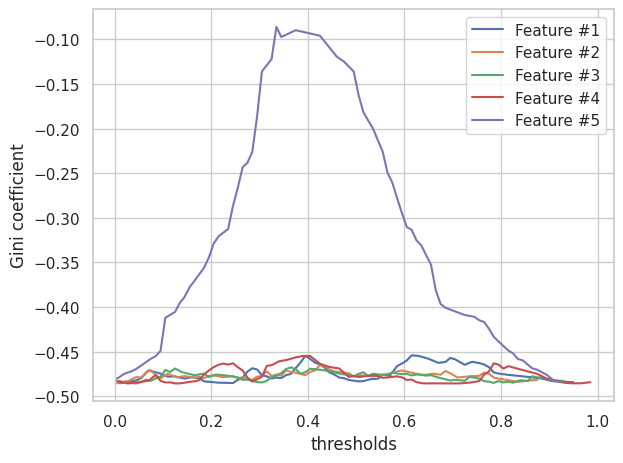

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.read_csv('students.csv')
data.head()
plt.subplot()
plt.xlabel('thresholds')
plt.ylabel('Gini coefficient')
for i in range(5):
  thresholds, ginis, threshold_best, gini_best = find_best_split(data.iloc[:,i], data.iloc[:,5])
  plt.plot(thresholds, ginis, label=f'Feature #{i+1}')
plt.legend()
plt.tight_layout()

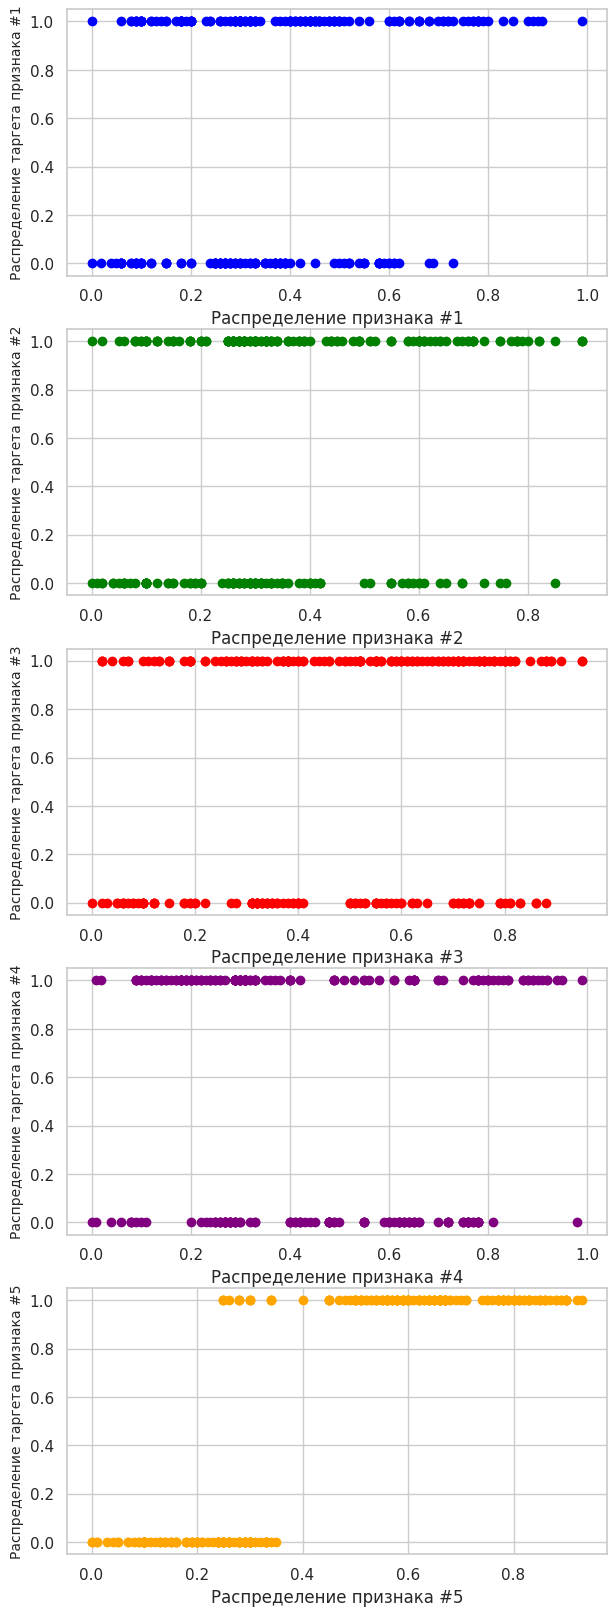

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(6, 16))
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(5):
  ax[i].set_xlabel(f'Распределение признака #{i+1}')
  ax[i].set_ylabel(f'Распределение таргета признака #{i+1}', fontsize=10)
  ax[i].scatter(data.iloc[:,i], data.iloc[:,5], color=colors[i])
plt.tight_layout(pad=0.1)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Как мы видим, наименьшее значение критерия Джини достигается по пятому признаку, поэтому по нему мы будем делить дерево на два подграфика.


---

Да, результат согласуется с изуальной оценкой scatter-графиков, поскольку как мы видим, по признаку 5 данные разделены почти идеально - до значения признака в 0.4 у нас в основном объекты отрицательного класса, а после - в основном полжительного, что делает простым разделение объектов на два поддерева.


---

Я бы охарактеризовал вид кривой как квадратичный. Это логично - сначала у нас до определенного порога идут только объекты отрицательного класса - и когда мы делаем порог слишком низкий - то во втором (скажем, правом) поддереве у нас будут как объекты положительного - так и отрицательного класса. Потом, когда мы порог поднимаем - все больше объектов отрицательного класса распределяются в левое поддерво. А соответственно, в правом выборка становится менее разнородной. Затем, если порог поставить слишком высокий - то левое поддерево уже становится более разнородным и потому индекс джини падает.


---
Как мы видим, кривые для признаков по которым деление практически невозможно идут то вверх, то вверх, то вниз - это связано с тем, что разбиение на классы практически не зависит от значения признака - и при повышении порога у нас одинаково плохая однородность как в левом, так и в правом поддереве. Конечно, благодаря тому, что могут подряд идти объекты только одного класса - критерий Джини будет показывать лучший результат, но это продлится недолго, поскольку потом снова будут объекты другого класса - и критерий снова будет показывать более плохой результат.


__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget  -O 'mushrooms.csv' -q 'https://www.dropbox.com/scl/fi/3y3zgj69xt65q9im6mu99/agaricus-lepiota.data?rlkey=hkiron6pmuotijiyeft00f7mq&st=152uijek&dl=0'

In [ ]:
df = pd.read_csv('mushrooms.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df_copy = df.copy()
y = df_copy.pop(0)
X = df_copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=52)
feature_types = np.array(['categorical']*(len(list(X.columns))))
dtc = DecisionTree(feature_types)
dtc.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = dtc.predict(X_test.to_numpy())
accuracy = np.mean(y_test.to_numpy() == y_pred)
print('Accuracy for this tree is', accuracy)
print('The depth of this tree is', dtc.calculate_tree_depth(dtc._tree))

Accuracy for this tree is 1.0
The depth of this tree is 7


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
!wget  -O 'tic-tac-toe-endgame.csv' -q 'https://www.dropbox.com/scl/fi/2pv5danei29cpjkb2juij/tic-tac-toe-endgame.csv?rlkey=734c564m4baecn1phc13d93ev&st=pti2a7cy&dl=0'

In [ ]:
daf = pd.read_csv('tic-tac-toe-endgame.csv')
daf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


Text(0, 0.5, 'accuracy_score')

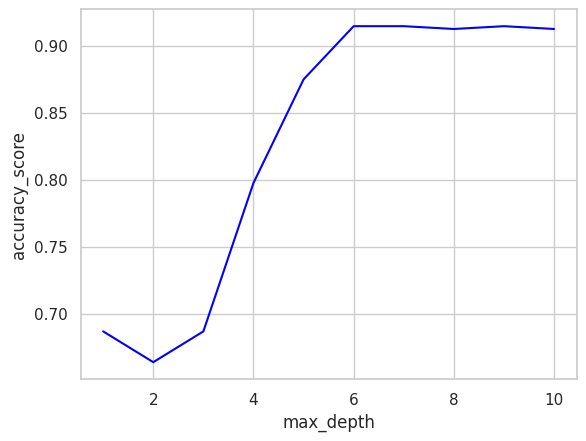

In [ ]:
from sklearn.metrics import accuracy_score
le = LabelEncoder()
daf['V10'] = le.fit_transform(daf['V10'])
X = daf.drop(columns='V10')
y = daf['V10']
y = y.astype(int)

feature_types_new = ['categorical']*9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=52)

values_of_accuracies = []
for i in range(1,11):
  dtc_new = DecisionTree(feature_types, max_depth=i)
  dtc_new.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = dtc_new.predict(X_test.to_numpy())
  values_of_accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(np.arange(1,11), values_of_accuracies, color='blue')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')

Text(0, 0.5, 'accuracy_score')

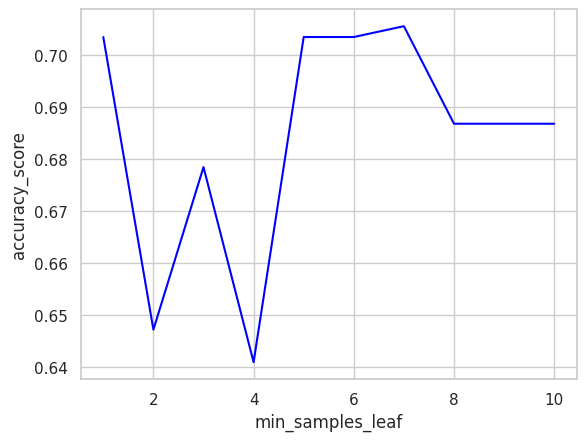

In [ ]:
values_of_accuracies = []
for i in range(1,11):
  dtc_new = DecisionTree(feature_types, min_samples_leaf=i)
  dtc_new.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = dtc_new.predict(X_test.to_numpy())
  values_of_accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(np.arange(1,11), values_of_accuracies, color='blue')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy_score')

Text(0, 0.5, 'accuracy_score')

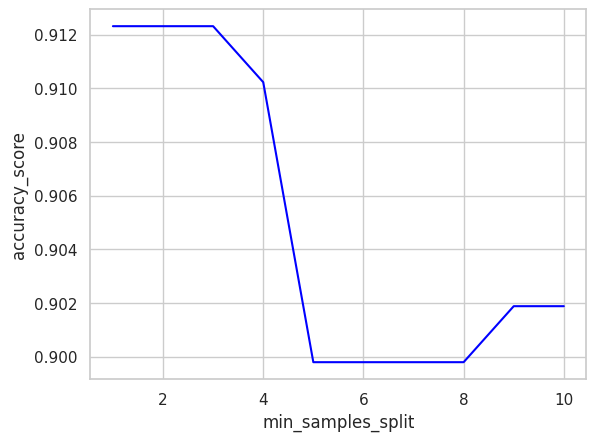

In [ ]:
values_of_accuracies = []
for i in range(1,11):
  dtc_new = DecisionTree(feature_types, min_samples_split=i)
  dtc_new.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = dtc_new.predict(X_test.to_numpy())
  values_of_accuracies.append(accuracy_score(y_test, y_pred))
plt.plot(np.arange(1,11), values_of_accuracies, color='blue')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy_score')

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

In [ ]:
#решил на 1.8
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# тут просто сортируем
    combined = np.column_stack((feature_vector, target_vector))
    sorted_indices = np.argsort(combined[:, 0])
    sorted_combined = combined[sorted_indices]

    sorted_features = sorted_combined[:, 0]
    sorted_targets = sorted_combined[:, 1]
#такой метод подсчета трешхолдов даст то, что у нас каждые два подряд идущие объекта образуют пару
    thresholds = (sorted_features[:-1] + sorted_features[1:]) / 2
    thresholds = thresholds[sorted_features[:-1] != sorted_features[1:]] #отбираем только те трешхолды, которые были получены из разных объектов, потому что
    #одинаковые объекты по-любому пойдут в одну сторону

    cumsum_left = np.cumsum(sorted_targets)[:-1][sorted_features[:-1] != sorted_features[1:]] #благодаря cumsum получаем доли положительного класса идя по трешхолдам от мин к макс
    cumsum_right = np.cumsum(sorted_targets)[-1] - cumsum_left
    left_q = np.arange(1, len(sorted_targets))[sorted_features[:-1] != sorted_features[1:]]
    right_q = len(sorted_targets) - left_q
    p1 = cumsum_left / left_q
    p0 = 1 - p1

    p1_r = cumsum_right / right_q
    p0_r = 1 - p1_r

    H_l = 1 - p1**2 - p0**2
    H_r = 1 - p1_r**2 - p0_r**2

    weight_l = (left_q / len(sorted_targets))
    weight_r = (right_q / len(sorted_targets))

    ginis = -weight_l * H_l - weight_r * H_r

    best_index = np.argmax(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]
    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):

        if self._max_depth is not None:
          if depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_split is not None:
          if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
              continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if self._min_samples_leaf is not None:
              split = feature_vector < threshold
              if np.sum(split) < self._min_samples_leaf or np.sum(~split) < self._min_samples_leaf:
                continue

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
            return node["class"]
        elif self._feature_types[node["feature_split"]] == "real":
          if x[node["feature_split"]] < node["threshold"]:
            return self._predict_node(x, node["left_child"])
          else:
            return self._predict_node(x, node["right_child"])
        elif self._feature_types[node["feature_split"]] == "categorical":
          if x[node["feature_split"]] in (node["categories_split"]):
            return self._predict_node(x, node["left_child"])
          else:
            return self._predict_node(x, node["right_child"])
        else:
          raise ValueError

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    def calculate_tree_depth(self, node):
      if len(node) == 0:
        return 0
      elif node["type"] == "terminal":
        return 0
      else:
        left_depth = self.calculate_tree_depth(node["left_child"])
        right_depth = self.calculate_tree_depth(node["right_child"])
        return max(left_depth, right_depth) + 1

from sklearn.linear_model import LinearRegression
import numpy as np

class LinearRegressionTree(DecisionTree):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        super().__init__(feature_types, max_depth, min_samples_split, min_samples_leaf)
        self._base_model = LinearRegression()

    def _find_best_split(self, feature_vector, target_vector):

        combined = np.column_stack((feature_vector, target_vector))
        sorted_indices = np.argsort(combined[:, 0])
        sorted_combined = combined[sorted_indices]

        sorted_features = sorted_combined[:, 0]
        sorted_targets = sorted_combined[:, 1]

        thresholds = (sorted_features[:-1] + sorted_features[1:]) / 2
        unique_mask = sorted_features[:-1] != sorted_features[1:]
        thresholds = thresholds[unique_mask]

        cumsum_total = np.cumsum(sorted_targets)
        sum_total = cumsum_total[-1]
        n_total = len(sorted_targets)

        cumsum_left = cumsum_total[:-1][unique_mask]
        n_left = np.arange(1, len(sorted_targets))[unique_mask]
        n_right = n_total - n_left
        sum_left = cumsum_left
        sum_right = sum_total - sum_left

        mean_left = sum_left / n_left
        mean_right = sum_right / n_right
#считаем среднеквадратичное отклонение
        mse_left = np.sum((sorted_targets[:-1] - mean_left) ** 2)
        mse_right = np.sum((sorted_targets[1:] - mean_right) ** 2)

        weighted_mse = (mse_left / n_total) + (mse_right / n_total)

        best_index = np.argmin(weighted_mse)
        threshold_best = thresholds[best_index]
        mse_best = weighted_mse[best_index]

        return thresholds, weighted_mse, threshold_best, mse_best
#идейно почти то же самое - только теперь модель в листьях
    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if self._max_depth is not None and depth >= self._max_depth:
            node["type"] = "terminal"
            node["regr"] = self._base_model.fit(sub_X, sub_y)
            return

        if self._min_samples_split is not None and len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["regr"] = self._base_model.fit(sub_X, sub_y)
            return

        feature_best, threshold_best, mse_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical": #не успеваю сделать правильное кодирование категориальных признаков, поэтому оставлю для классификации, но можно апгрейдить
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError("Unknown feature type")

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, mse = self._find_best_split(feature_vector, sub_y)
            if self._min_samples_leaf is not None:
                split = feature_vector < threshold
                if np.sum(split) < self._min_samples_leaf or np.sum(np.logical_not(split)) < self._min_samples_leaf:
                    continue

            if mse_best is None or mse < mse_best:
                feature_best = feature
                mse_best = mse
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError("Unknown feature type")

        if feature_best is None:
            node["type"] = "terminal"
            node["regr"] = self._base_model.fit(sub_X, sub_y)
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Unknown feature type")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):

        if node["type"] == "terminal":
            return node["regr"].predict([x])[0]
        elif self._feature_types[node["feature_split"]] == "real":
            if x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[node["feature_split"]] == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")

    def fit(self, X, y):
      self._fit_node(X, y, self._tree)

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_node(x, self._tree))
        return np.array(predictions)


__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: